# Using machine learning to predict MLB All-Star selection and cluster data

Data source: Baseball Reference

https://www.baseball-reference.com/leagues/majors/2024-standard-batting.shtml


We will be analyzing  batting statistics for every player with a plate appearance in the 2024 season and attempting to predict whether or not each one was named to the All-Star Game.

### Import Libraries and Dataset

In [486]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import seaborn as sns
import dataframe_image as dfi
%matplotlib inline

In [487]:
mlb = pd.read_csv("/Users/matthewcavanaugh/Desktop/IOD Data camp/Project 2/2024 MLB Batting Uncleaned.csv")
mlb

,Rk,Player,Age,Team,Lg,WAR,G,PA,AB,R,...,Rbat+,TB,GIDP,HBP,SH,SF,IBB,Pos,Awards,Player-additional
0,1,Pete Alonso,29,NYM,NL,2.6,162,695,608,91,...,122.0,279,14,13,0,4,4,*3/DH,AS,alonspe01
1,2,Marcell Ozuna,33,ATL,NL,4.3,162,688,606,96,...,154.0,331,23,3,0,4,2,*D,AS,ozunama01
2,3,Matt Olson*,30,ATL,NL,4.0,162,685,600,78,...,117.0,274,15,9,0,5,5,*3,NaN,olsonma02
3,4,Nick Castellanos,32,PHI,NL,0.8,162,659,606,80,...,108.0,261,14,10,0,2,2,*9/D,NaN,casteni01
4,5,Bobby Witt Jr.,24,KCR,AL,9.4,161,709,636,125,...,171.0,374,4,8,0,8,9,*6/D,ASGG,wittbo02
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
736,737,Owen White,24,TEX,AL,0.0,1,0,0,0,...,NaN,0,0,0,0,0,0,/1,NaN,whiteow01
737,738,Justin Wilson*,36,CIN,NL,0.0,1,0,0,0,...,NaN,0,0,0,0,0,0,1,NaN,wilsoju10
738,739,Josh Winckowski,26,BOS,AL,0.0,1,0,0,0,...,NaN,0,0,0,0,0,0,1,NaN,winckjo01
739,740,Alex Young*,30,CIN,NL,0.0,1,0,0,0,...,NaN,0,0,0,0,0,0,/1,NaN,youngal01


### EDA and cleaning

In [488]:
mlb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 741 entries, 0 to 740
Data columns (total 35 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Rk                 741 non-null    int64  
 1   Player             741 non-null    object 
 2   Age                741 non-null    int64  
 3   Team               741 non-null    object 
 4   Lg                 741 non-null    object 
 5   WAR                739 non-null    float64
 6   G                  741 non-null    int64  
 7   PA                 741 non-null    int64  
 8   AB                 741 non-null    int64  
 9   R                  741 non-null    int64  
 10  H                  741 non-null    int64  
 11  2B                 741 non-null    int64  
 12  3B                 741 non-null    int64  
 13  HR                 741 non-null    int64  
 14  RBI                741 non-null    int64  
 15  SB                 741 non-null    int64  
 16  CS                 741 non

In [489]:
mlb.describe()

,Rk,Age,WAR,G,PA,AB,R,H,2B,3B,...,OPS,OPS+,rOBA,Rbat+,TB,GIDP,HBP,SH,SF,IBB
count,741.000000,741.000000,739.000000,741.000000,741.000000,741.000000,741.000000,741.000000,741.000000,741.000000,...,651.000000,651.000000,651.000000,651.000000,741.000000,741.000000,741.000000,741.000000,741.000000,741.000000
mean,371.000000,27.973009,0.800541,68.483131,246.219973,220.900135,28.802969,53.742240,10.487179,0.940621,...,0.640326,80.514593,0.288120,79.207373,88.187584,4.354926,2.726046,0.609987,1.701754,0.686910
std,214.052564,3.700157,1.640750,54.536958,222.813451,199.385924,28.980451,52.326441,10.691821,1.672265,...,0.192347,52.906225,0.077029,55.921002,89.135419,4.838982,3.678900,1.364752,2.110171,1.808898
min,1.000000,20.000000,-2.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,-100.000000,0.000000,-145.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,186.000000,25.000000,-0.100000,15.000000,37.000000,33.000000,3.000000,6.000000,1.000000,0.000000,...,0.574000,62.000000,0.265000,60.000000,9.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,371.000000,27.000000,0.100000,62.000000,188.000000,172.000000,19.000000,37.000000,7.000000,0.000000,...,0.660000,87.000000,0.298000,87.000000,57.000000,3.000000,1.000000,0.000000,1.000000,0.000000
75%,556.000000,30.000000,1.300000,120.000000,430.000000,389.000000,48.000000,93.000000,18.000000,1.000000,...,0.745000,109.000000,0.329000,109.000000,149.000000,7.000000,4.000000,1.000000,3.000000,1.000000
max,741.000000,40.000000,10.800000,162.000000,735.000000,671.000000,134.000000,211.000000,48.000000,14.000000,...,2.067000,468.000000,0.807000,455.000000,411.000000,25.000000,22.000000,11.000000,13.000000,20.000000


Very little cleaning required, as long as you have the data properly sorted when you download the CSV. If you sort by some metrics (Plate Appearances in my case), it will separate statistics for players who played for multiple teams and in multiple leagues, resulting in false duplicates which are very difficult to get rid of. When I sorted by games played, each player had their full-season stats listed in a single row, regardless of how many teams they played for. 

Below, we will check to make sure the number of players is the same as the number of rows in the DataFrame (741).

In [490]:
mlb['Player'].nunique()

741

Success! Now we can be sure there are no duplicates.

Some player names have special characters next to them. We will have to remove these - if we don't, we won't be able to easily search by player name.

In [491]:
def clean_text(text):
    return "".join(ch for ch in text if ch.isalpha() or ch.isspace())
mlb['Player'] = mlb['Player'].apply(clean_text)
mlb

,Rk,Player,Age,Team,Lg,WAR,G,PA,AB,R,...,Rbat+,TB,GIDP,HBP,SH,SF,IBB,Pos,Awards,Player-additional
0,1,Pete Alonso,29,NYM,NL,2.6,162,695,608,91,...,122.0,279,14,13,0,4,4,*3/DH,AS,alonspe01
1,2,Marcell Ozuna,33,ATL,NL,4.3,162,688,606,96,...,154.0,331,23,3,0,4,2,*D,AS,ozunama01
2,3,Matt Olson,30,ATL,NL,4.0,162,685,600,78,...,117.0,274,15,9,0,5,5,*3,NaN,olsonma02
3,4,Nick Castellanos,32,PHI,NL,0.8,162,659,606,80,...,108.0,261,14,10,0,2,2,*9/D,NaN,casteni01
4,5,Bobby Witt Jr,24,KCR,AL,9.4,161,709,636,125,...,171.0,374,4,8,0,8,9,*6/D,ASGG,wittbo02
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
736,737,Owen White,24,TEX,AL,0.0,1,0,0,0,...,NaN,0,0,0,0,0,0,/1,NaN,whiteow01
737,738,Justin Wilson,36,CIN,NL,0.0,1,0,0,0,...,NaN,0,0,0,0,0,0,1,NaN,wilsoju10
738,739,Josh Winckowski,26,BOS,AL,0.0,1,0,0,0,...,NaN,0,0,0,0,0,0,1,NaN,winckjo01
739,740,Alex Young,30,CIN,NL,0.0,1,0,0,0,...,NaN,0,0,0,0,0,0,/1,NaN,youngal01


Baseball Reference includes a column listing all awards won by each player, but does not individually list specifically whether each player made the All-Star team, so we will have to make our own. While we're at it, we should ensure it is a numeric datatype.

In [492]:
mlb['AS'] = mlb['Awards'].str.contains('AS').map({True: '1', False: '0'})
mlb['AS'] = mlb['AS'].fillna('0')

In [493]:
mlb['AS'] = mlb['AS'].astype(int)

### Drop a few columns
1. 'Rk' is an artifact from when I gathered the data - a ranking of whichever metric you were sorting by when you created the CSV (in my case Games played) so it is redundant.
2. 'Player-additional' is an additional tag given to each player by Baseball Reference to avoid confusion in cases such as multiple players having the same name. Not needed in our case.
3. 'Awards' has served its purpose in helping us create the 'AS' column and is no longer needed.
4. 'Team' and 'Lg' would make the results unfair considering that some players played for multiple teams, and in some cases in both leagues, over the course of the season.
5. 'Pos' would make things too confusing, considering that some players played at multiple positions over the course of the season.

In [494]:
mlb.drop('Rk', axis=1, inplace=True)
mlb.drop('Player-additional', axis=1, inplace=True)
mlb.drop('Awards', axis=1, inplace=True)
mlb.drop('Team', axis=1, inplace=True)
mlb.drop('Lg', axis=1, inplace=True)
mlb.drop('Pos', axis=1, inplace=True)

### Drop rows where PA is 0
Some players are listed here despite having no plate appearances. This would skew our statistics too much, so let's get rid of them

In [495]:
mlb.drop(mlb[mlb['PA'] == 0].index, inplace=True)

In [496]:
mlb['Player'].nunique()

651

In [497]:
mlb.isnull().sum()

Player    0
Age       0
WAR       2
G         0
PA        0
AB        0
R         0
H         0
2B        0
3B        0
HR        0
RBI       0
SB        0
CS        0
BB        0
SO        0
BA        0
OBP       0
SLG       0
OPS       0
OPS+      0
rOBA      0
Rbat+     0
TB        0
GIDP      0
HBP       0
SH        0
SF        0
IBB       0
AS        0
dtype: int64

We have a couple nulls for WAR (wins above replacement). This may be the result of the players not having enough plate appearances to calculate the metric. Let's fill these with 0.

In [498]:
mlb['WAR'] = mlb['WAR'].fillna(0)

In [499]:
mlb.isnull().sum()

Player    0
Age       0
WAR       0
G         0
PA        0
AB        0
R         0
H         0
2B        0
3B        0
HR        0
RBI       0
SB        0
CS        0
BB        0
SO        0
BA        0
OBP       0
SLG       0
OPS       0
OPS+      0
rOBA      0
Rbat+     0
TB        0
GIDP      0
HBP       0
SH        0
SF        0
IBB       0
AS        0
dtype: int64

Confirmed, we now have no nulls.

Now, set 'player' as index.

In [500]:
mlb.set_index('Player', inplace=True)

In [501]:
mlb

,Age,WAR,G,PA,AB,R,H,2B,3B,HR,...,OPS+,rOBA,Rbat+,TB,GIDP,HBP,SH,SF,IBB,AS
Player,,,,,,,,,,,,,,,,,,,,,
Pete Alonso,29,2.6,162,695,608,91,146,31,0,34,...,123.0,0.341,122.0,279,14,13,0,4,4,1
Marcell Ozuna,33,4.3,162,688,606,96,183,31,0,39,...,154.0,0.394,154.0,331,23,3,0,4,2,1
Matt Olson,30,4.0,162,685,600,78,148,37,1,29,...,118.0,0.342,117.0,274,15,9,0,5,5,0
Nick Castellanos,32,0.8,162,659,606,80,154,30,4,23,...,106.0,0.327,108.0,261,14,10,0,2,2,0
Bobby Witt Jr,24,9.4,161,709,636,125,211,45,11,32,...,171.0,0.416,171.0,374,4,8,0,8,9,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
David Bañuelos,27,0.0,1,1,1,0,0,0,0,0,...,-100.0,0.000,-127.0,0,0,0,0,0,0,0
Luis Castillo,31,0.0,1,1,1,0,0,0,0,0,...,-100.0,0.000,-118.0,0,0,0,0,0,0,0
Daniel Johnson,28,0.0,1,1,1,1,0,0,0,0,...,-100.0,0.000,-127.0,0,0,0,0,0,0,0


In [503]:
mlb['AS'].value_counts()

AS
0    605
1     46
Name: count, dtype: int64

46 All-Stars, 605 non All-Stars.

## Correlation heatmap

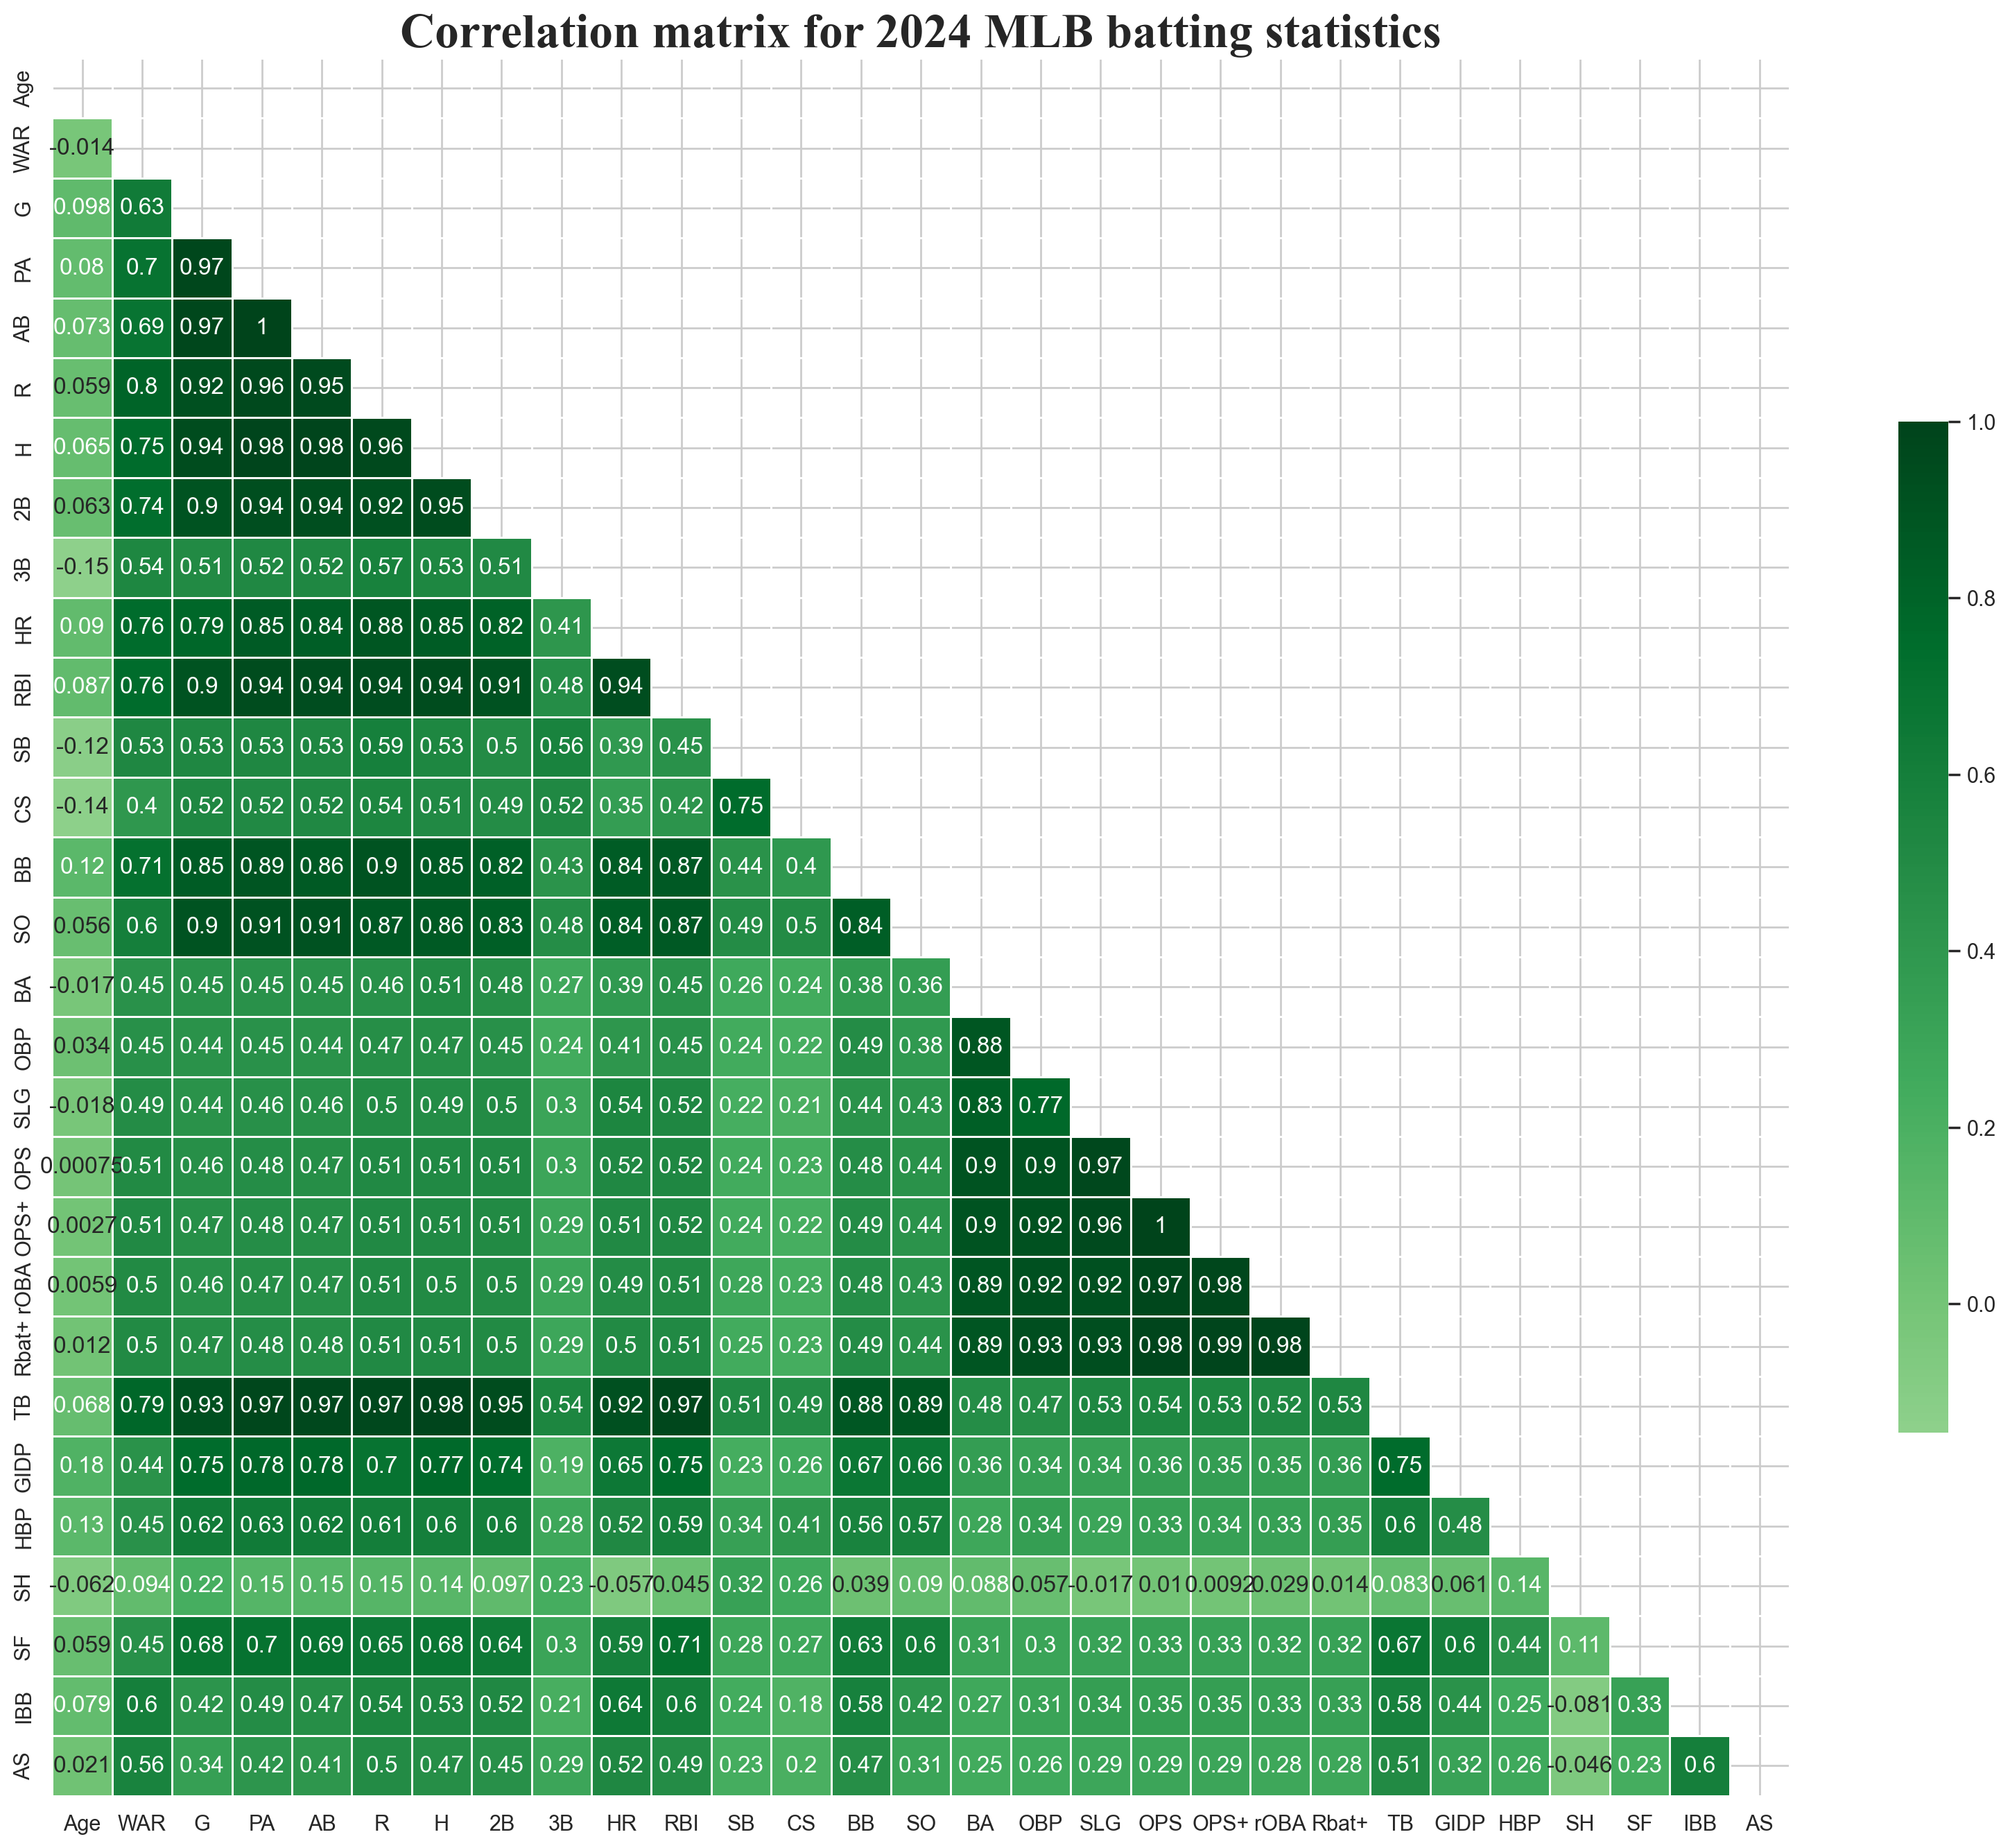

In [504]:
sns.set(style="whitegrid")

# Generate a mask for the upper triangle
mask = np.zeros_like(mlb.corr(numeric_only = True), dtype=bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(18, 18))

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(mlb.corr(numeric_only = True), mask=mask, cmap='Greens', vmax=1, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot=True)

plt.title("Correlation matrix for 2024 MLB batting statistics", font='Times new roman', fontsize=25, fontweight='bold')
#plt.savefig("Correlation matrix for 2024 MLB batting statistics.png")
plt.show()

### "Snubbed" and "undeserving" players?

In [505]:
nostar = mlb[mlb['AS'] == 0]
nostar.idxmax()

Age            Yuli Gurriel
WAR            Matt Chapman
G                Matt Olson
PA           Ezequiel Tovar
AB           Ezequiel Tovar
R            Corbin Carroll
H            Ezequiel Tovar
2B           Ezequiel Tovar
3B           Corbin Carroll
HR             Brent Rooker
RBI            Willy Adames
SB             Brice Turang
CS           José Caballero
BB           Kyle Schwarber
SO           Ezequiel Tovar
BA            Stone Garrett
OBP           Stone Garrett
SLG           Stone Garrett
OPS           Stone Garrett
OPS+          Stone Garrett
rOBA          Stone Garrett
Rbat+         Stone Garrett
TB         Francisco Lindor
GIDP          Manny Machado
HBP         Randy Arozarena
SH            Michael Siani
SF       Vinnie Pasquantino
IBB          Cody Bellinger
AS               Matt Olson
dtype: object

In [506]:
allstar = mlb[mlb['AS'] == 1]
allstar.idxmin()

Age        Jackson Merrill
WAR            Luis Arráez
G         Christian Yelich
PA        Christian Yelich
AB        Christian Yelich
R                David Fry
H              Kyle Tucker
2B        Christian Yelich
3B             Pete Alonso
HR             Luis Arráez
RBI       Christian Yelich
SB          Salvador Perez
CS             Pete Alonso
BB         Jordan Westburg
SO             Luis Arráez
BA       Anthony Santander
OBP          Marcus Semien
SLG           Willi Castro
OPS          Marcus Semien
OPS+          Ryan McMahon
rOBA         Marcus Semien
Rbat+         Ryan McMahon
TB        Christian Yelich
GIDP      Gunnar Henderson
HBP           José Ramírez
SH             Pete Alonso
SF             Jose Altuve
IBB           Willi Castro
AS             Pete Alonso
dtype: object

## General visualizations

In [507]:
min200pa = mlb[mlb['PA'] >= 200]

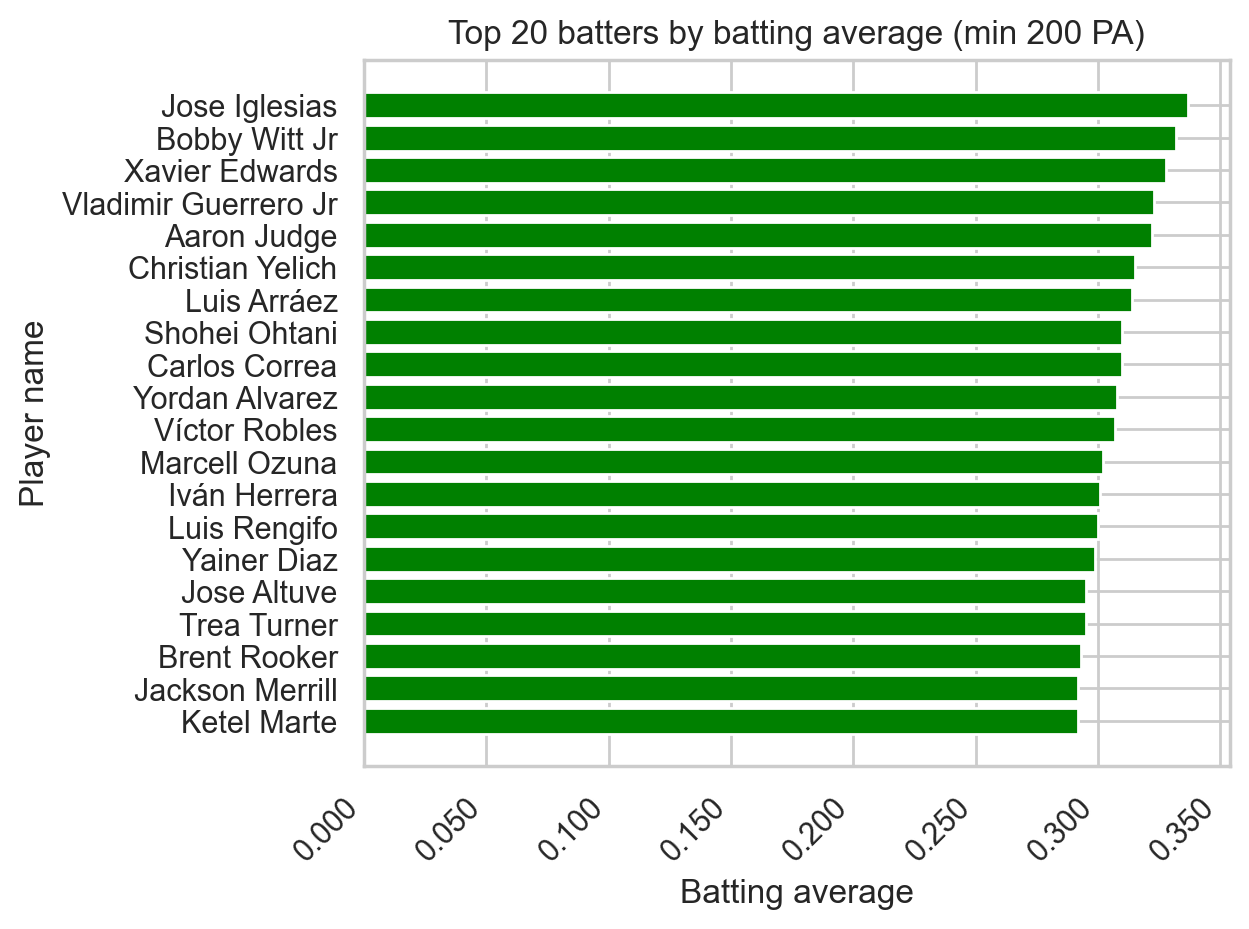

In [508]:
top20ba = min200pa['BA'].nlargest(20)

plt.barh(top20ba.index, top20ba.values, color='green')
plt.xticks(rotation=45, ha='right')
plt.gca().invert_yaxis()
plt.gca().xaxis.set_major_formatter(ticker.FormatStrFormatter('%.3f'))
plt.title('Top 20 batters by batting average (min 200 PA)')
plt.xlabel('Batting average')
plt.ylabel('Player name')
plt.tight_layout()
#plt.savefig('Batting averages barchart')
plt.show()

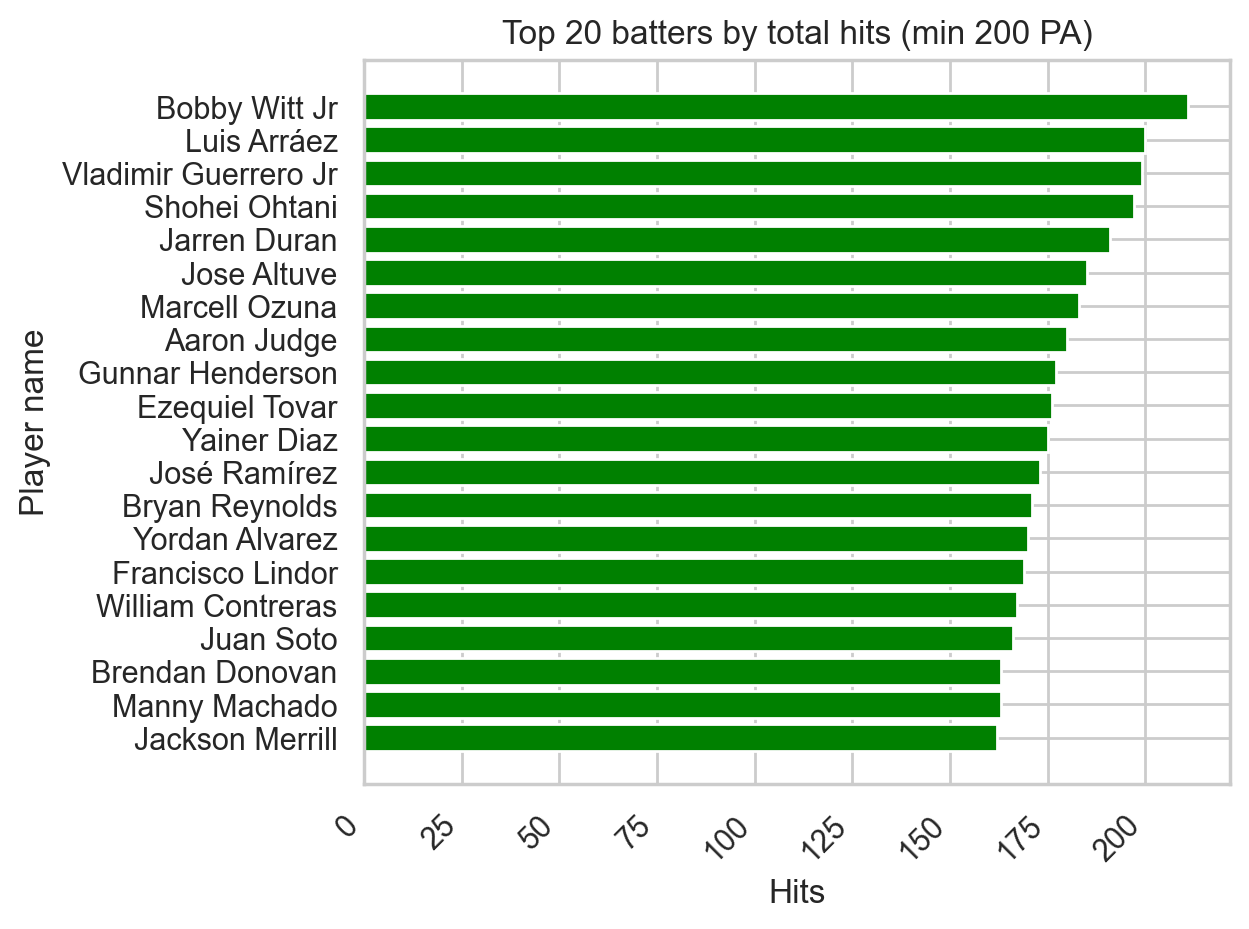

In [509]:
top20h = min200pa['H'].nlargest(20)

plt.barh(top20h.index, top20h.values, color='green')
plt.xticks(rotation=45, ha='right')
plt.gca().invert_yaxis()
plt.title('Top 20 batters by total hits (min 200 PA)')
plt.xlabel('Hits')
plt.ylabel('Player name')
plt.tight_layout()
#plt.savefig('Hits barchart')
plt.show()

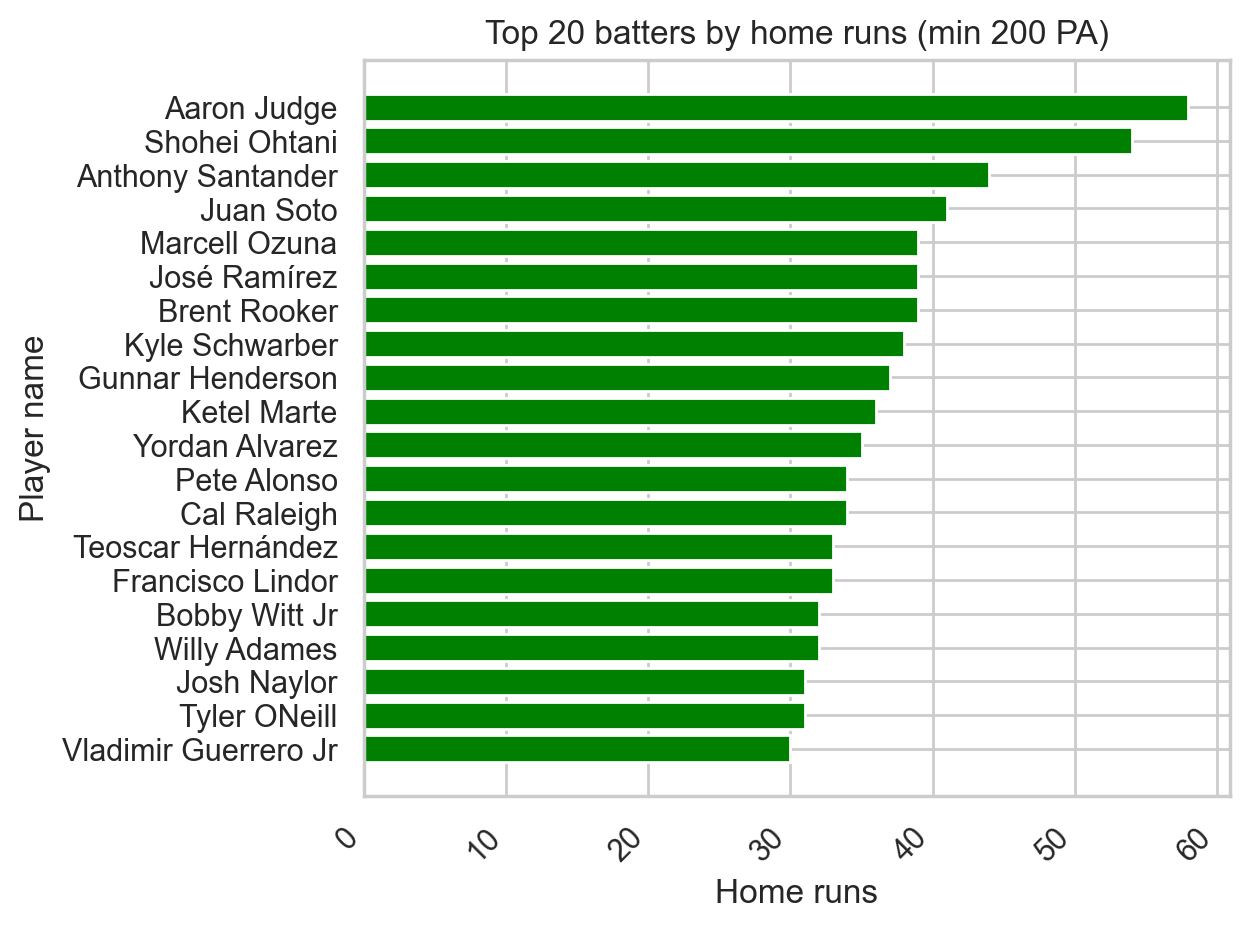

In [510]:
top20hr = min200pa['HR'].nlargest(20)

plt.barh(top20hr.index, top20hr.values, color='green')
plt.xticks(rotation=45, ha='right')
plt.gca().invert_yaxis()
plt.title('Top 20 batters by home runs (min 200 PA)')
plt.xlabel('Home runs')
plt.ylabel('Player name')
plt.tight_layout()
#plt.savefig('Home runs barchart')
plt.show()

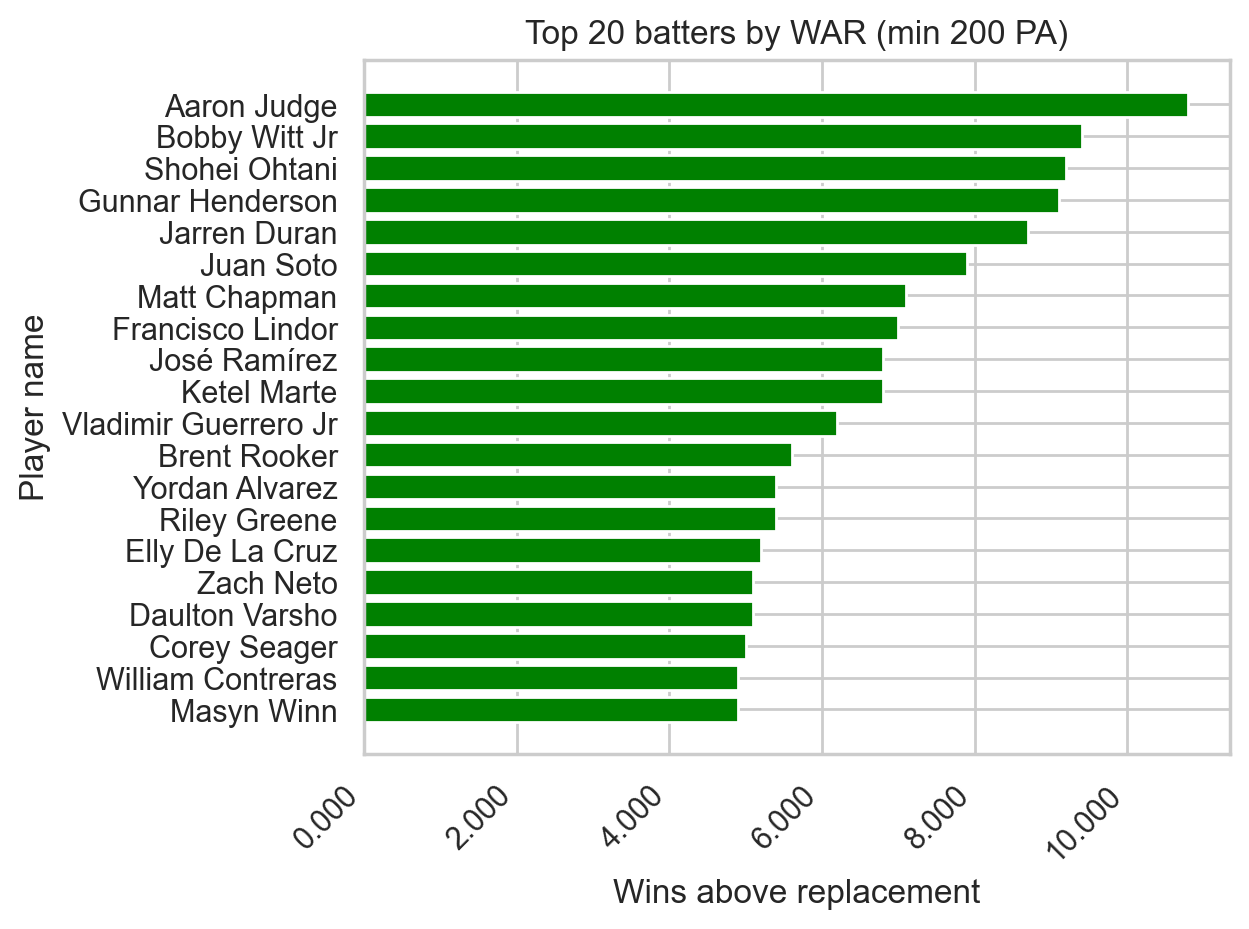

In [511]:
top20war = min200pa['WAR'].nlargest(20)

plt.barh(top20war.index, top20war.values, color='green')
plt.xticks(rotation=45, ha='right')
plt.gca().invert_yaxis()
plt.gca().xaxis.set_major_formatter(ticker.FormatStrFormatter('%.3f'))
plt.title('Top 20 batters by WAR (min 200 PA)')
plt.xlabel('Wins above replacement')
plt.ylabel('Player name')
plt.tight_layout()
#plt.savefig('WAR barchart')
plt.show()

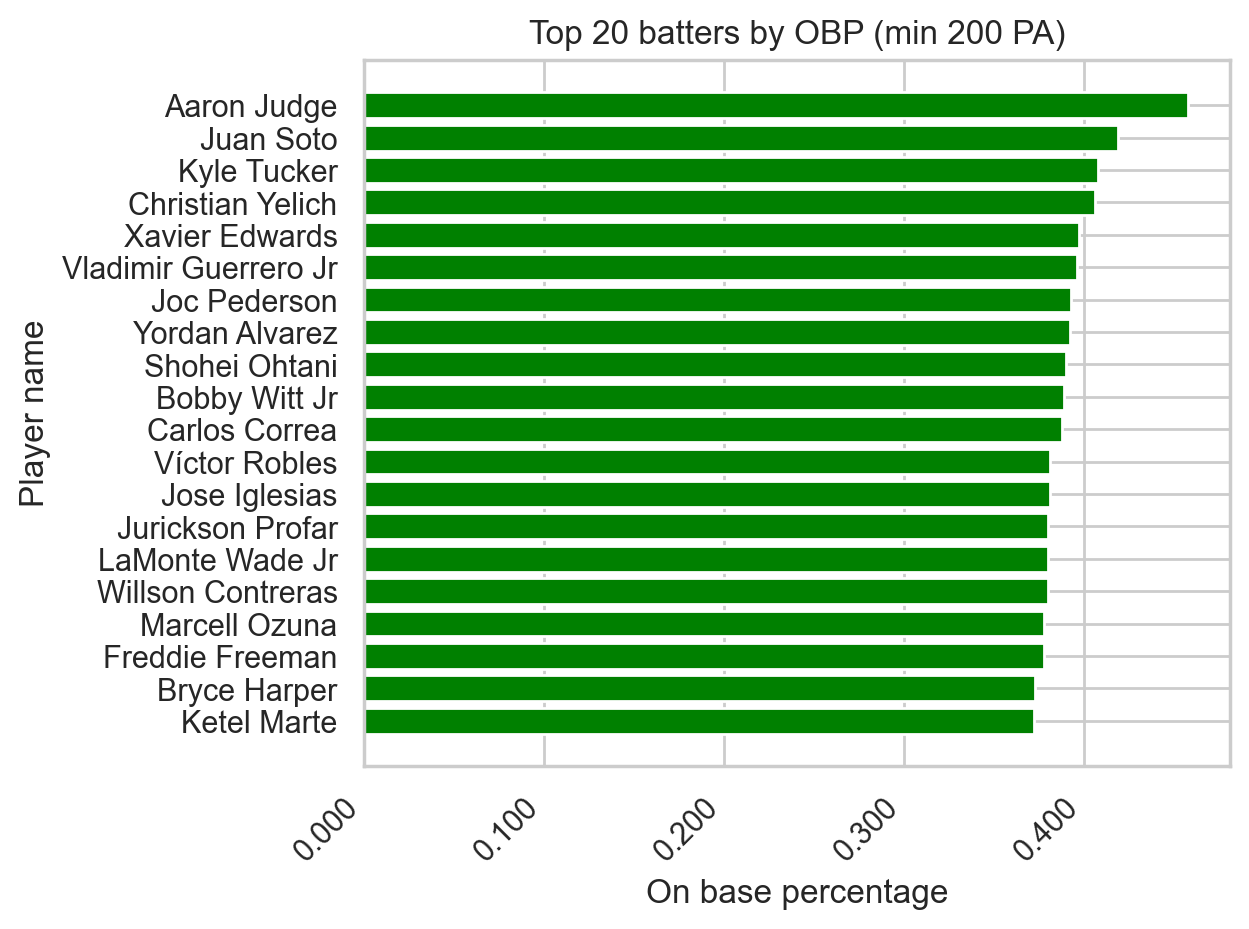

In [512]:
top20obp = min200pa['OBP'].nlargest(20)

plt.barh(top20obp.index, top20obp.values, color='green')
plt.xticks(rotation=45, ha='right')
plt.gca().invert_yaxis()
plt.gca().xaxis.set_major_formatter(ticker.FormatStrFormatter('%.3f'))
plt.title('Top 20 batters by OBP (min 200 PA)')
plt.xlabel('On base percentage')
plt.ylabel('Player name')
plt.tight_layout()
#plt.savefig('OBP barchart')
plt.show()

# Model 1: Logistic Regression (reference v3)
### Can we predict whether each player was named an All-Star?

In [702]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [703]:
#Set features as all columns, except the index and last
#Set target as 'AS'
X = mlb.iloc[:, 1:]
y = mlb['AS']

In [704]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.80, random_state=9)

In [705]:
logreg = LogisticRegression()

In [706]:
logreg.fit(X_test, y_test)

/opt/anaconda3/envs/IOD2/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [707]:
logreg.score(X_test, y_test)

0.9712092130518234

In [708]:
logreg.fit(X_train, y_train)

/opt/anaconda3/envs/IOD2/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [709]:
logreg.score(X_train, y_train)

1.0

In [710]:
logreg.intercept_

array([-0.32978908])

In [711]:
from sklearn import metrics
y_pred_class = logreg.predict(X_train)
print(metrics.confusion_matrix(y_train, y_pred_class))

[[120   0]
 [  0  10]]


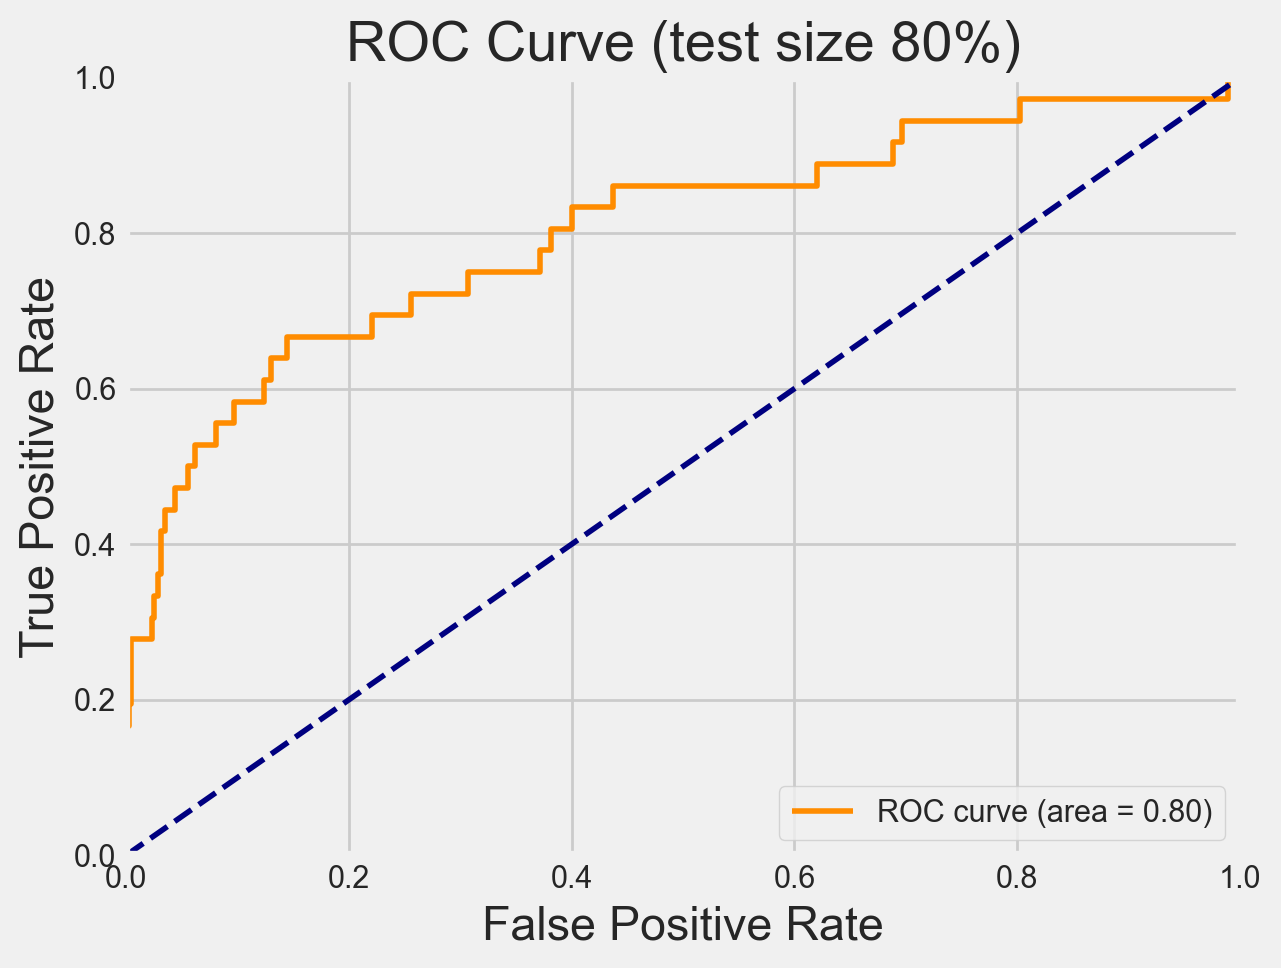

In [712]:
# Generate the prediction values for each of the test observations using predict_proba() function rather than just predict
preds = logreg.predict_proba(X_test)[:,1]

# Store the false positive rate(fpr), true positive rate (tpr) in vectors for use in the graph
fpr, tpr, _ = metrics.roc_curve(y_test, preds)

# Store the Area Under the Curve (AUC) so we can annotate our graph with this metric
roc_auc = metrics.auc(fpr, tpr)

# Plot the ROC Curve
plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange', lw = lw, label = 'ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color = 'navy', lw = lw, linestyle = '--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve (test size 80%)')
plt.legend(loc = "lower right")
#plt.savefig('ROC Curve (test size 80%)')
plt.show()

### Confusion matrix for test dataset

In [713]:
# predict test class:
y_pred = logreg.predict(X_test)

# predicted test probability:
y_pp = logreg.predict_proba(X_test)

In [714]:
from sklearn.metrics import accuracy_score, confusion_matrix

Note - had to set an additional paramter for confusion matrix labels, as otherwise the 1s and 0s were getting flipped for some reason.

In [715]:
con_mat = confusion_matrix(y_test, y_pred)
con_mat

array([[472,  13],
       [ 24,  12]])

In [716]:
y_pred_allstar = logreg.predict(X_test)
print(metrics.confusion_matrix(y_test, y_pred_allstar))

[[472  13]
 [ 24  12]]


In [717]:
confusion = pd.DataFrame(con_mat, columns=['predicted_allstarstar','predicted_nostar'],
                         index=['is_allstar', 'is_nostar'])
confusion

,predicted_allstarstar,predicted_nostar
is_allstar,472,13
is_nostar,24,12


### Accuracy, precision, and recall

In [718]:
TP = confusion_matrix(y_test, y_pred)[1, 1]
TN = confusion_matrix(y_test, y_pred)[0, 0]
FP = confusion_matrix(y_test, y_pred)[0, 1]
FN = confusion_matrix(y_test, y_pred)[1, 0]

In [719]:
#Accuracy
Accuracy = (TP + TN) / (TP + TN + FP + FN)
Accuracy

0.9289827255278311

In [720]:
#Precision
Precision = TP / (TP + FP)
Precision

0.48

In [721]:
#Recall aka sensitivity
Recall = TP / (TP + FN)
Recall

0.3333333333333333

### Confusion matrix and stats on whole dataset

In [694]:
logreg.fit(X,y)

/opt/anaconda3/envs/IOD2/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [695]:
logreg.score(X,y)

0.9738863287250384

In [696]:
logreg.coef_

array([[ 0.11980357, -0.24167615,  0.08925953, -0.09367809,  0.0446983 ,
         0.06768361, -0.1478921 ,  0.44159337, -0.2275565 , -0.03194238,
        -0.18126545,  0.41190518, -0.01157102, -0.01721197, -0.11299592,
        -0.16507709, -0.16124592, -0.32633091, -0.06482737, -0.16829368,
         0.05271323,  0.12030875,  0.18595398,  0.31646766,  0.09020901,
        -0.48450258,  0.76956384,  0.7563427 ]])

In [697]:
logreg.intercept_

array([-0.93409333])

In [698]:
# predict test class:
y_pred = logreg.predict(X)

# predicted test probability:
#y_pp = logreg.predict_proba(X_test)

In [699]:
con_mat = confusion_matrix(y, y_pred)
con_mat

array([[598,   7],
       [ 10,  36]])

#### False negatives (players predicted to not be All-Stars, but actually were).

In [700]:
fn_indices = [i for i, (true, pred) in enumerate(zip(y, y_pred)) if true == 1 and pred == 0]
fn_rows = mlb.iloc[fn_indices]
fn_rows

,Age,WAR,G,PA,AB,R,H,2B,3B,HR,...,OPS+,rOBA,Rbat+,TB,GIDP,HBP,SH,SF,IBB,AS
Player,,,,,,,,,,,,,,,,,,,,,
Pete Alonso,29,2.6,162,695,608,91,146,31,0,34,...,123.0,0.341,122.0,279,14,13,0,4,4,1
Marcus Semien,33,4.1,159,718,650,101,154,27,2,23,...,100.0,0.310,100.0,254,9,3,0,1,2,1
Jackson Merrill,21,4.4,156,593,554,77,162,31,6,24,...,127.0,0.357,126.0,277,2,1,4,5,1,1
Anthony Santander,29,2.9,155,665,595,91,140,25,2,44,...,134.0,0.346,131.0,301,9,7,0,5,3,1
Ryan McMahon,29,2.5,153,645,567,68,137,28,0,20,...,95.0,0.311,90.0,225,9,3,0,4,4,1
Isaac Paredes,25,2.7,153,641,542,64,129,25,1,19,...,112.0,0.331,115.0,213,17,17,0,6,2,1
Adley Rutschman,26,3.4,148,638,571,68,143,21,1,19,...,107.0,0.313,107.0,223,9,2,0,7,3,1
Alec Bohm,27,3.0,143,606,554,62,155,44,2,15,...,117.0,0.340,117.0,248,18,6,0,6,2,1
David Fry,28,1.4,122,392,335,44,88,18,1,14,...,128.0,0.352,128.0,150,13,9,0,4,4,1


#### False positives (players predicted to be All-Stars, but weren't).

In [701]:
fp_indices = [i for i, (true, pred) in enumerate(zip(y, y_pred)) if true == 0 and pred == 1]
fp_rows = mlb.iloc[fp_indices]
fp_rows

,Age,WAR,G,PA,AB,R,H,2B,3B,HR,...,OPS+,rOBA,Rbat+,TB,GIDP,HBP,SH,SF,IBB,AS
Player,,,,,,,,,,,,,,,,,,,,,
Manny Machado,31,3.2,152,643,593,77,163,30,0,29,...,120.0,0.344,118.0,280,25,1,0,4,6,0
Brent Rooker,29,5.6,145,614,546,82,160,26,2,39,...,165.0,0.399,166.0,307,5,5,0,4,4,0
Seiya Suzuki,29,3.5,132,585,512,74,145,27,6,21,...,138.0,0.364,136.0,247,6,6,0,4,3,0
Cody Bellinger,28,2.2,130,569,516,72,137,23,3,18,...,111.0,0.326,108.0,220,10,3,0,5,7,0
Tyler ONeill,29,2.7,113,473,411,74,99,18,0,31,...,132.0,0.365,131.0,210,13,7,0,2,5,0
Willson Contreras,32,2.9,84,358,301,48,79,17,0,15,...,136.0,0.370,137.0,141,7,12,0,0,2,0
Cooper Hummel,29,-0.1,6,8,8,0,0,0,0,0,...,-100.0,0.143,-42.0,0,1,0,0,0,0,0


# Model 2: K-Nearest Neighbors (KNN)
### Can we predict whether each player was named an All-Star?

In [591]:
from itertools import combinations
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
#plt.style.use('fivethirtyeight')
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn import metrics
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
from sklearn.neighbors import KNeighborsClassifier
import statistics

In [592]:
X = mlb.iloc[:, 1:-1]
y = mlb['AS']

In [593]:
X_train, X_test, y_train, y_test, = train_test_split(X, y, test_size = 0.8, random_state=9)

### Evaluate the test accuracy of a KNN where K == number of rows in the training data. 

In [594]:
# Create an instance of KNeighborsClassifier where n_neighbors = number of rows in the training data
k = X_train.shape[0]

knn = KNeighborsClassifier(n_neighbors=k)

In [595]:
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=130)

In [596]:
# Plot test accuracy by number of neighbors:

test_acc = []

for i in range(1, X_train.shape[0]+1):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    test_acc.append(knn.score(X_test, y_test))

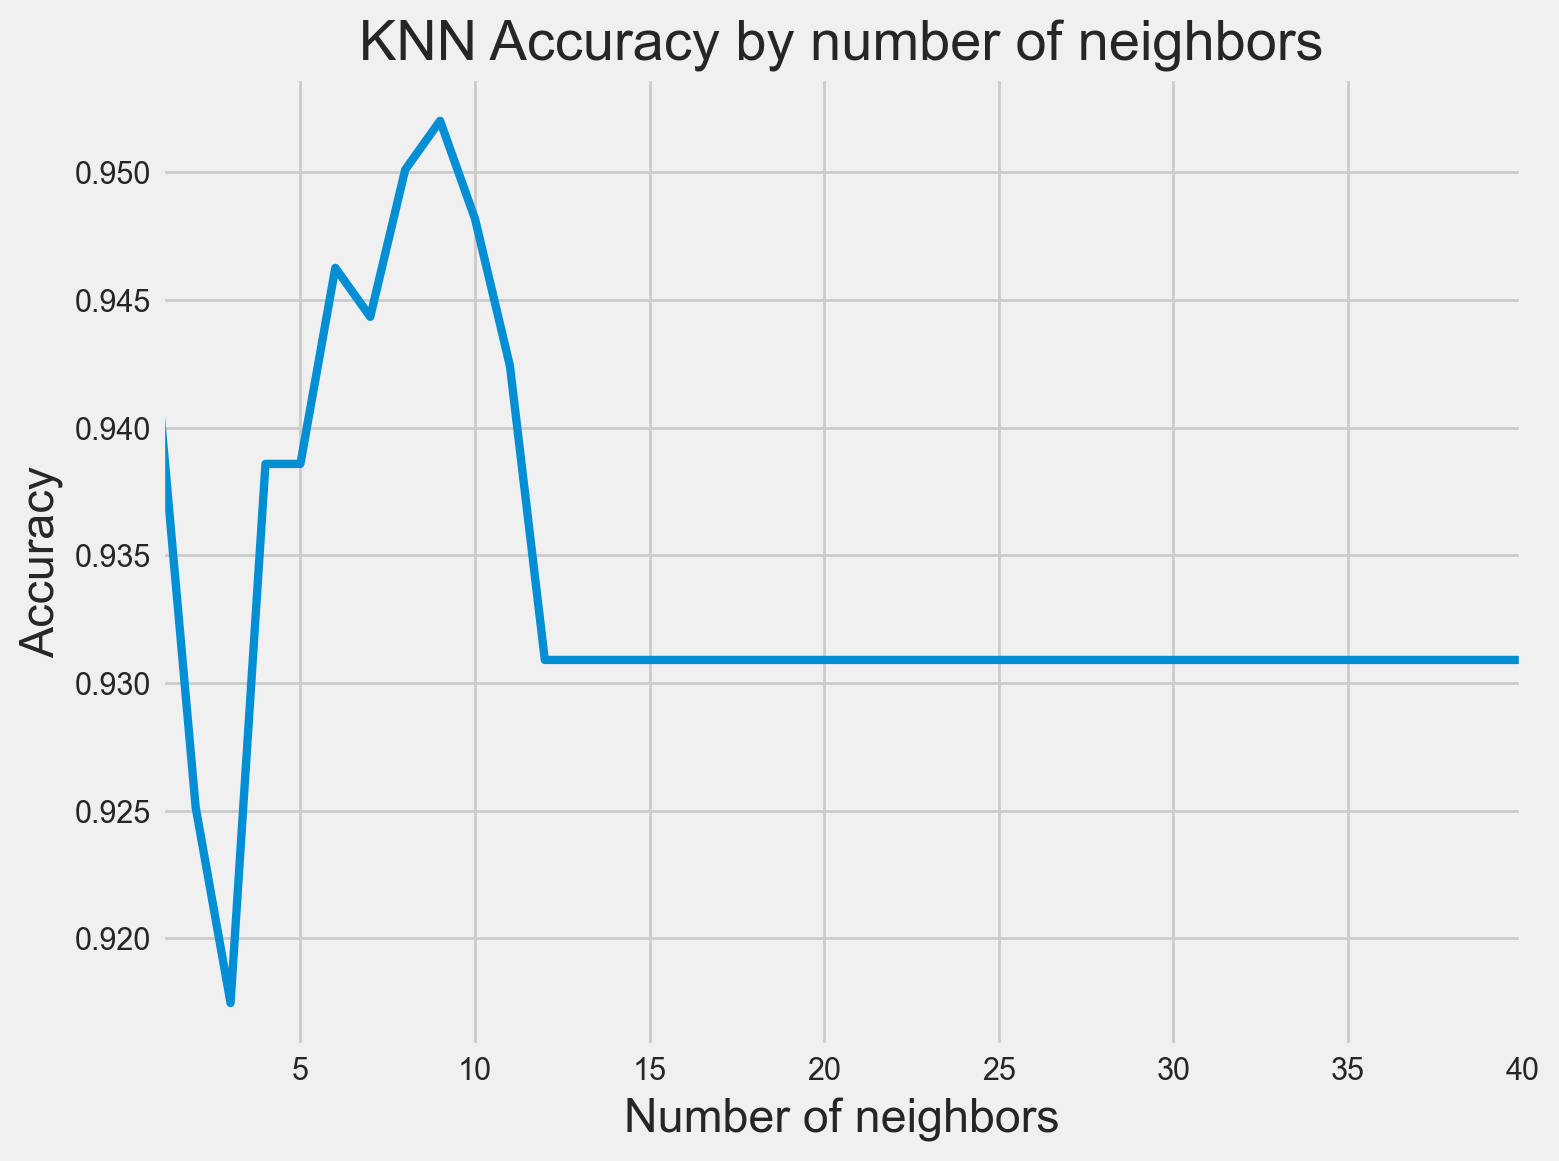

In [597]:
#sns.set_style("whitegrid")
fig, ax = plt.subplots(figsize=(8,6))
ax.plot(list(range(1, X_train.shape[0]+1)), test_acc, lw=3.)
plt.xlim(1, 40)
plt.title('KNN Accuracy by number of neighbors')
plt.xlabel('Number of neighbors')
plt.ylabel('Accuracy')
plt.tight_layout()
#plt.savefig('KNN Accuracy by number of neighbors')
plt.show()

### Plot both together
### Standardize the predictor matrix and cross-validate across the different K.

In [598]:
max_neighbors = X_train.shape[0]

In [599]:
ss = StandardScaler()
Xs = ss.fit_transform(X)

In [600]:
# plot test accuracy by number of neighbors:
test_acc = []

for i in range(1, max_neighbors):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    test_acc.append(knn.score(X_test, y_test))

In [601]:
# Plot test accuracy by number of neighbors:
test_acc_std = []
for i in range(1, int(max_neighbors)):
    knn = KNeighborsClassifier(n_neighbors=i)
    test_acc_std.append(np.mean(cross_val_score(knn, Xs, y, cv=5)))

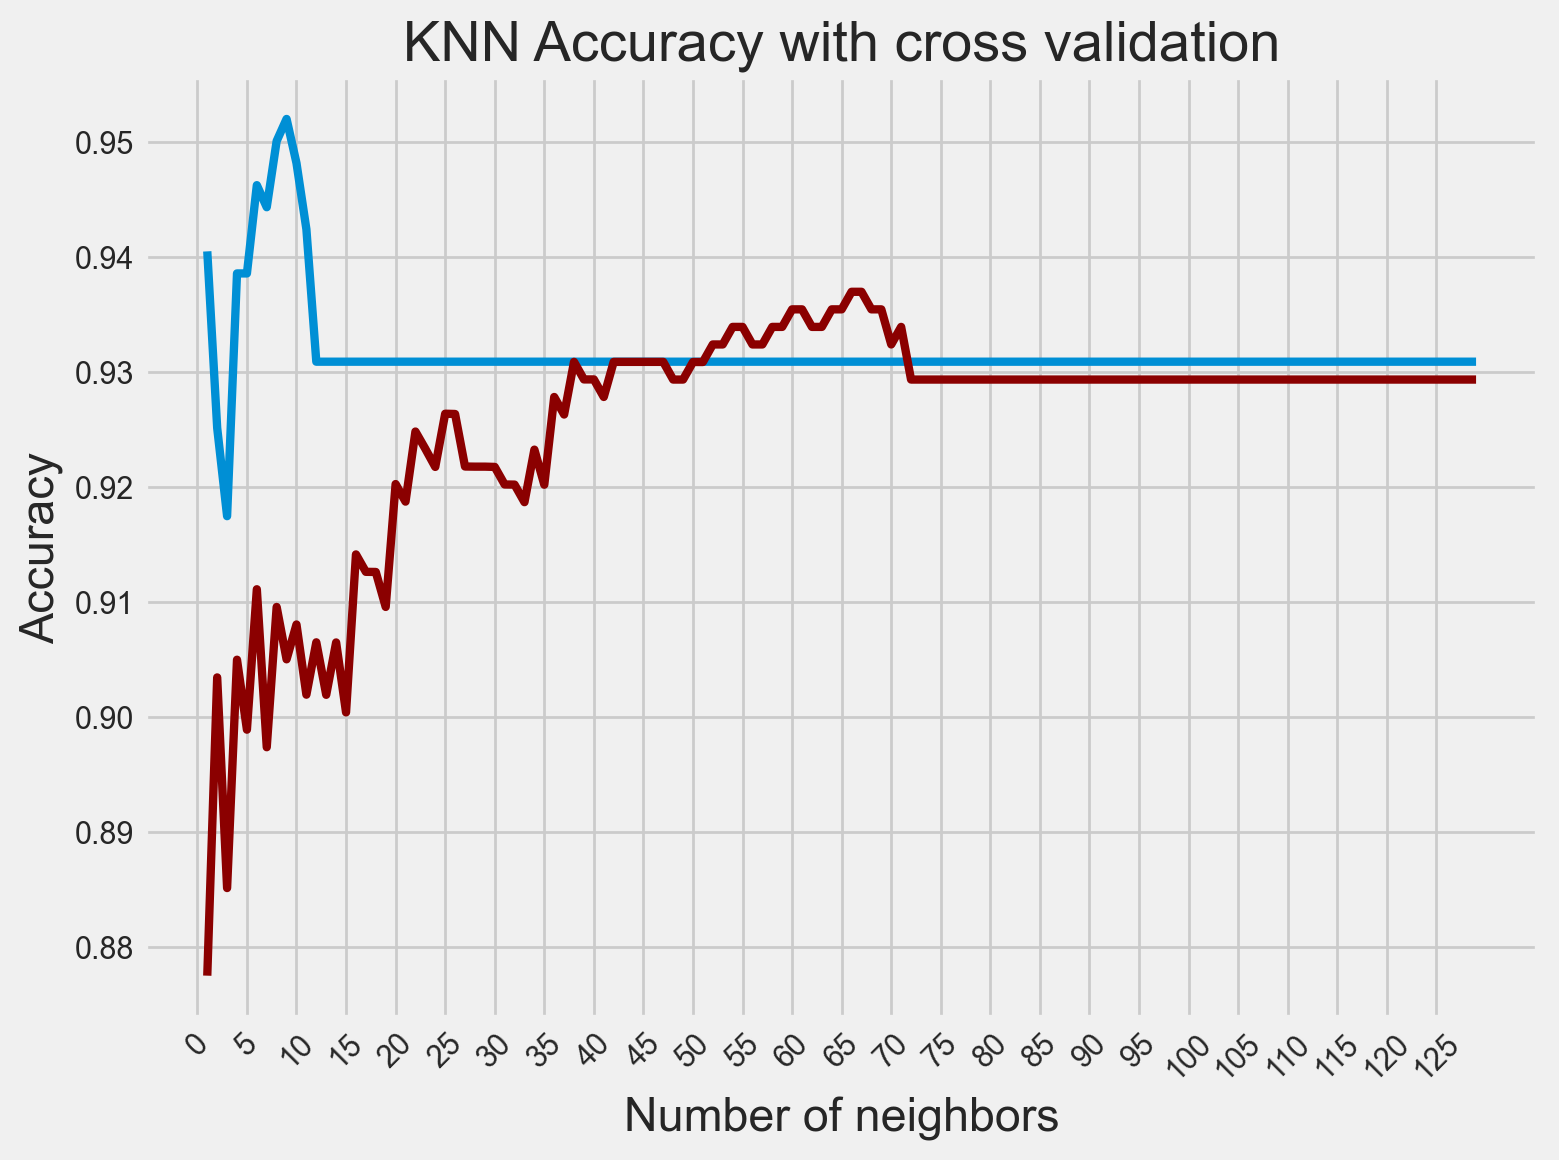

In [602]:
fig, ax = plt.subplots(figsize=(8,6))
ax.plot(list(range(1, int(max_neighbors))), test_acc, lw=3.)
ax.plot(list(range(1, int(max_neighbors))), test_acc_std, lw=3., color='darkred')
plt.title('KNN Accuracy with cross validation')
plt.xlabel('Number of neighbors')
plt.ylabel('Accuracy')
plt.xticks(np.arange(0, int(max_neighbors), 5))
plt.xticks(rotation=45)
plt.tight_layout()
#plt.savefig('KNN Accuracy with cross validation')
plt.show()

### We've established 9 as the ideal n neighbors. Let's model it.

In [603]:
knn = KNeighborsClassifier(n_neighbors=9)

In [604]:
knn.fit(X, y)

KNeighborsClassifier(n_neighbors=9)

In [605]:
knn.score(X, y)

0.9615975422427036

In [606]:
y_pred = knn.predict(X)

In [607]:
from sklearn import metrics

print(metrics.accuracy_score(y, y_pred))

0.9615975422427036


In [608]:
X_train, X_test, y_train, y_test, = train_test_split(X, y, test_size = 0.8, random_state=9)

In [609]:
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=9)

In [610]:
knn.score(X_train, y_train)

0.9461538461538461

In [611]:
knn.fit(X_test, y_test)

KNeighborsClassifier(n_neighbors=9)

In [612]:
knn.score(X_test, y_test)

0.9596928982725528

In [613]:
from sklearn.metrics import accuracy_score, confusion_matrix

In [614]:
# predict test class:
y_pred = knn.predict(X)

In [615]:
con_mat = confusion_matrix(y, y_pred, labels=[1, 0])
con_mat

array([[ 20,  26],
       [  2, 603]])

In [616]:
confusion = pd.DataFrame(con_mat, columns=['predicted_allstar','predicted_nostar'],
                         index=['is_allstar', 'is_nostar'])
confusion

,predicted_allstar,predicted_nostar
is_allstar,20,26
is_nostar,2,603


In [617]:
TP = confusion_matrix(y, y_pred)[1, 1]
TN = confusion_matrix(y, y_pred)[0, 0]
FP = confusion_matrix(y, y_pred)[0, 1]
FN = confusion_matrix(y, y_pred)[1, 0]

In [618]:
#Accuracy
Accuracy = (TP + TN) / (TP + TN + FP + FN)
Accuracy

0.956989247311828

In [619]:
#Precision
Precision = TP / (TP + FP)
Precision

0.9090909090909091

In [620]:
#Recall aka sensitivity
Recall = TP / (TP + FN)
Recall

0.43478260869565216

### There were only two false positives. Let's see them.

In [621]:
fp_indices = [i for i, (true, pred) in enumerate(zip(y, y_pred)) if true == 0 and pred == 1]
fp_rows = mlb.iloc[fp_indices]
fp_rows

,Age,WAR,G,PA,AB,R,H,2B,3B,HR,...,OPS+,rOBA,Rbat+,TB,GIDP,HBP,SH,SF,IBB,AS
Player,,,,,,,,,,,,,,,,,,,,,
Francisco Lindor,30,7.0,152,689,618,107,169,39,1,33,...,138.0,0.373,141.0,309,7,12,0,3,0,0
Brent Rooker,29,5.6,145,614,546,82,160,26,2,39,...,165.0,0.399,166.0,307,5,5,0,4,4,0


### The recall score was pretty bad, meaning there were too few true positives and too many false negatives. Let's dive into both and get a breakdown of stats.

#### True positives

In [622]:
tp_indices = [i for i, (true, pred) in enumerate(zip(y, y_pred)) if true == 1 and pred == 1]
tp_rows = mlb.iloc[tp_indices]
tp_rows

,Age,WAR,G,PA,AB,R,H,2B,3B,HR,...,OPS+,rOBA,Rbat+,TB,GIDP,HBP,SH,SF,IBB,AS
Player,,,,,,,,,,,,,,,,,,,,,
Marcell Ozuna,33,4.3,162,688,606,96,183,31,0,39,...,154.0,0.394,154.0,331,23,3,0,4,2,1
Bobby Witt Jr,24,9.4,161,709,636,125,211,45,11,32,...,171.0,0.416,171.0,374,4,8,0,8,9,1
Jarren Duran,27,8.7,160,735,671,111,191,48,14,21,...,129.0,0.373,134.0,330,6,6,1,3,1,1
Shohei Ohtani,29,9.2,159,731,636,134,197,38,7,54,...,190.0,0.449,190.0,411,7,6,0,5,10,1
Gunnar Henderson,23,9.1,159,719,630,118,177,31,7,37,...,159.0,0.385,157.0,333,2,7,0,4,1,1
Vladimir Guerrero Jr,25,6.2,159,697,616,98,199,44,1,30,...,166.0,0.399,165.0,335,16,5,0,4,12,1
Aaron Judge,32,10.8,158,704,559,122,180,36,1,58,...,223.0,0.484,223.0,392,22,9,0,2,20,1
José Ramírez,31,6.8,158,682,620,114,173,39,2,39,...,143.0,0.376,140.0,333,9,1,0,6,12,1
Jurickson Profar,31,3.7,158,668,564,94,158,29,0,24,...,134.0,0.369,137.0,259,14,18,5,5,4,1


In [623]:
tp_rows.mean()

Age       28.70000
WAR        5.89500
G        153.75000
PA       674.25000
AB       589.50000
R        100.75000
H        170.25000
2B        34.45000
3B         3.25000
HR        33.40000
RBI       98.20000
SB        14.85000
CS         3.15000
BB        73.05000
SO       128.00000
BA         0.28850
OBP        0.37035
SLG        0.52845
OPS        0.89900
OPS+     151.55000
rOBA       0.38680
Rbat+    151.30000
TB       311.40000
GIDP      12.35000
HBP        6.55000
SH         0.35000
SF         4.45000
IBB        7.50000
AS         1.00000
dtype: float64

#### False negatives

In [624]:
fn_indices = [i for i, (true, pred) in enumerate(zip(y, y_pred)) if true == 1 and pred == 0]
fn_rows = mlb.iloc[fn_indices]
fn_rows

,Age,WAR,G,PA,AB,R,H,2B,3B,HR,...,OPS+,rOBA,Rbat+,TB,GIDP,HBP,SH,SF,IBB,AS
Player,,,,,,,,,,,,,,,,,,,,,
Pete Alonso,29,2.6,162,695,608,91,146,31,0,34,...,123.0,0.341,122.0,279,14,13,0,4,4,1
Elly De La Cruz,22,5.2,160,696,618,105,160,36,10,25,...,119.0,0.367,122.0,291,12,6,2,1,2,1
Marcus Semien,33,4.1,159,718,650,101,154,27,2,23,...,100.0,0.310,100.0,254,9,3,0,1,2,1
Salvador Perez,34,2.6,158,652,590,58,160,28,0,27,...,119.0,0.339,116.0,269,17,11,0,6,9,1
Willi Castro,27,1.6,158,635,558,89,138,31,5,12,...,102.0,0.326,108.0,215,8,21,1,4,0,1
Jackson Merrill,21,4.4,156,593,554,77,162,31,6,24,...,127.0,0.357,126.0,277,2,1,4,5,1,1
Teoscar Hernández,31,4.3,154,652,589,84,160,32,2,33,...,137.0,0.368,141.0,295,7,8,0,1,3,1
Ryan McMahon,29,2.5,153,645,567,68,137,28,0,20,...,95.0,0.311,90.0,225,9,3,0,4,4,1
Isaac Paredes,25,2.7,153,641,542,64,129,25,1,19,...,112.0,0.331,115.0,213,17,17,0,6,2,1


In [625]:
fn_rows.mean()

Age       27.461538
WAR        3.300000
G        131.846154
PA       558.346154
AB       498.730769
R         72.153846
H        133.846154
2B        25.576923
3B         2.653846
HR        20.230769
RBI       69.500000
SB        10.884615
CS         3.153846
BB        48.653846
SO       109.500000
BA         0.270692
OBP        0.343115
SLG        0.458538
OPS        0.801615
OPS+     125.346154
rOBA       0.350500
Rbat+    125.307692
TB       225.423077
GIDP       9.153846
HBP        6.730769
SH         0.538462
SF         3.230769
IBB        2.923077
AS         1.000000
dtype: float64

# Model 3: DBSCAN
### Can we make a good-looking cluster of home runs and batting average?

In [626]:
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_blobs

In [627]:
X = mlb[['HR', 'BA']].values

In [628]:
dbscan = DBSCAN(eps=1, min_samples=5)
labels = dbscan.fit_predict(X)

In [629]:
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)

In [630]:
print("Estimated number of clusters:", n_clusters_)
print("Estimated number of noise points: %d" % n_noise_)

Estimated number of clusters: 7
Estimated number of noise points: 36


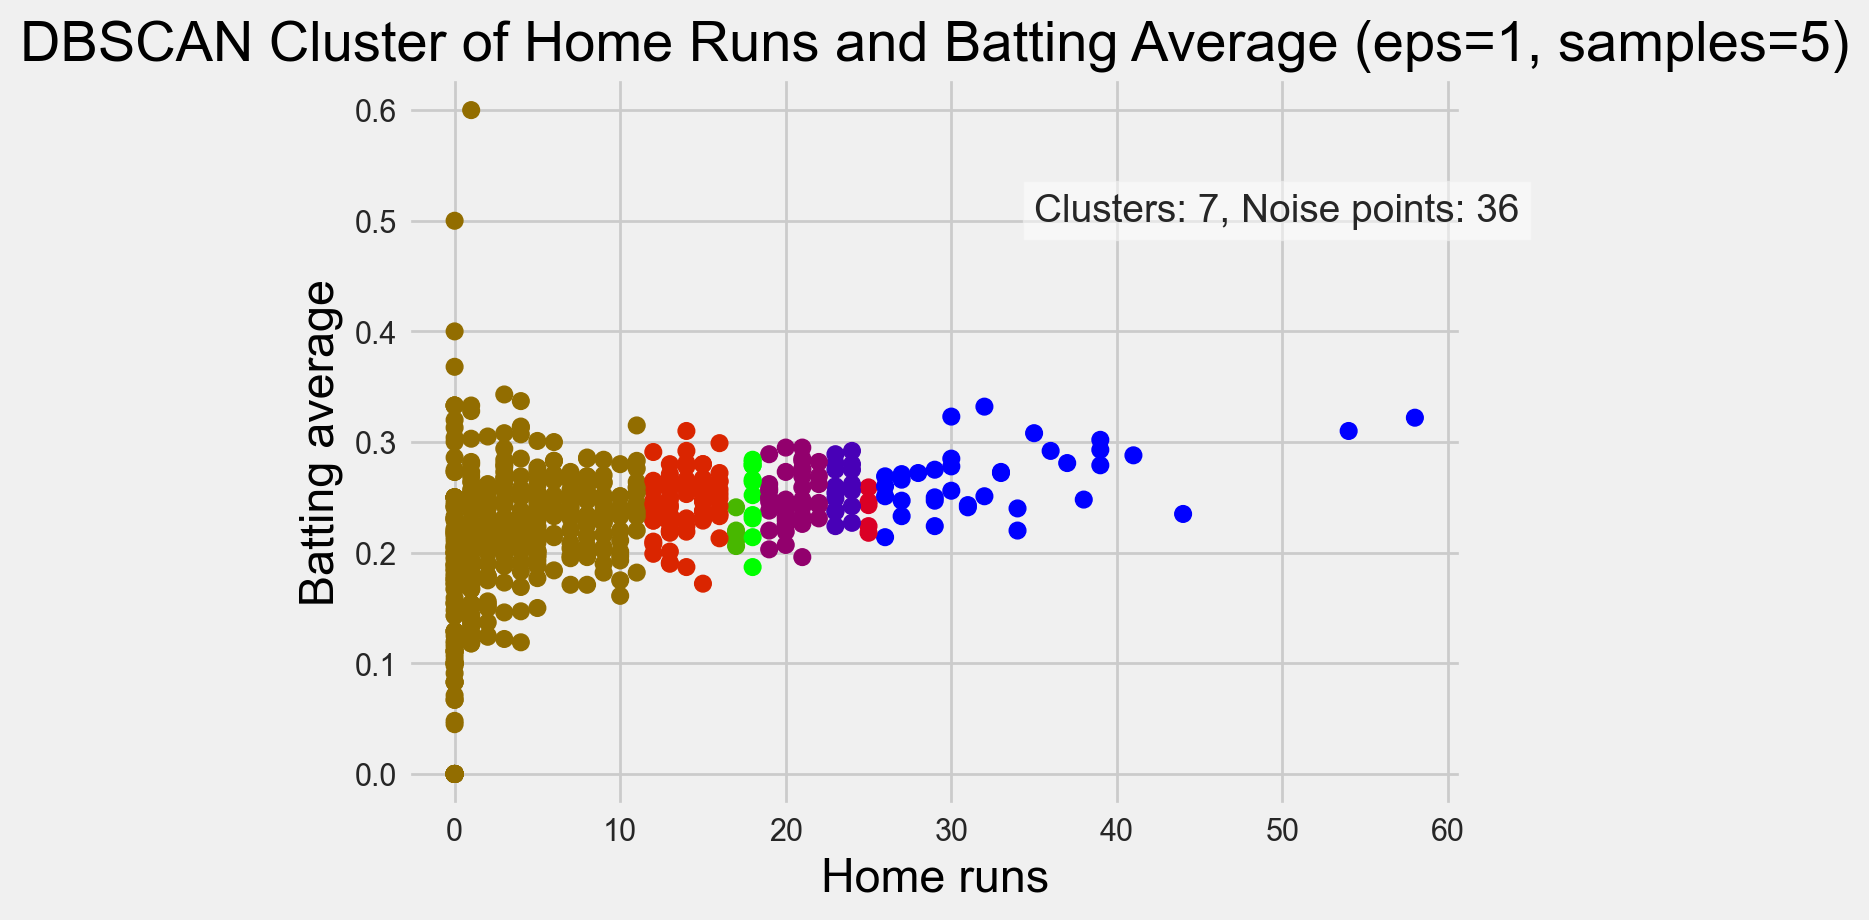

In [631]:
plt.scatter(mlb['HR'], mlb['BA'], c=labels, cmap='brg')
plt.title('DBSCAN Cluster of Home Runs and Batting Average (eps=1, samples=5)', color='black')
plt.xlabel('Home runs', color='black')
plt.ylabel('Batting average', color='black')
plt.text(35,0.5, 'Clusters: 7, Noise points: 36', bbox=dict(facecolor='white', alpha=0.5))
#plt.savefig('DBSCAN Cluster of Home Runs and Batting Average eps 1 samples 5.png')
plt.tight_layout()
plt.show()

### Let's try changing epsilon to 1.1

In [632]:
dbscan = DBSCAN(eps=1.1, min_samples=5)
labels = dbscan.fit_predict(X)

In [633]:
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)

In [634]:
print("Estimated number of clusters:", n_clusters_)
print("Estimated number of noise points: %d" % n_noise_)

Estimated number of clusters: 2
Estimated number of noise points: 5


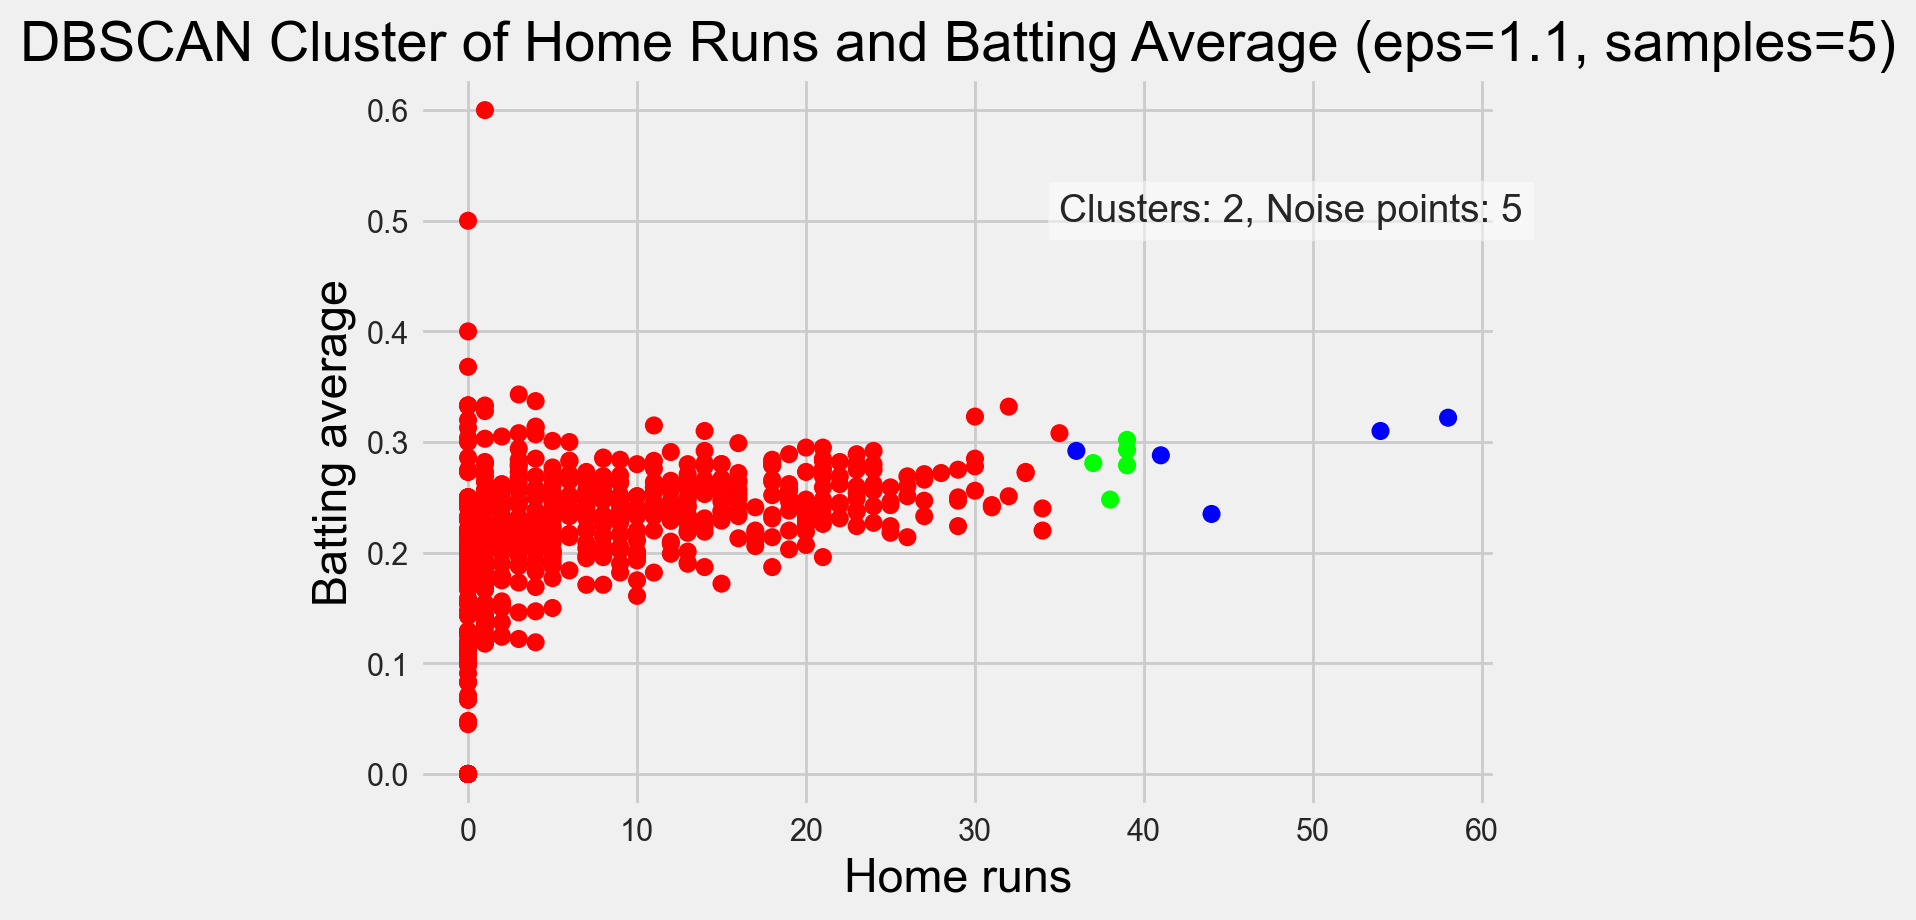

In [635]:
plt.scatter(mlb['HR'], mlb['BA'], c=labels, cmap='brg')
plt.title('DBSCAN Cluster of Home Runs and Batting Average (eps=1.1, samples=5)', color='black')
plt.xlabel('Home runs', color='black')
plt.ylabel('Batting average', color='black')
plt.text(35,0.5, 'Clusters: 2, Noise points: 5', bbox=dict(facecolor='white', alpha=0.5))
#plt.savefig('DBSCAN Cluster of Home Runs and Batting Average eps 1.1 samples 5.png')
plt.tight_layout()
plt.show()

### Try epsilon 0.9

In [636]:
dbscan = DBSCAN(eps=0.9, min_samples=5)
labels = dbscan.fit_predict(X)

In [637]:
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)

In [638]:
print("Estimated number of clusters:", n_clusters_)
print("Estimated number of noise points: %d" % n_noise_)

Estimated number of clusters: 26
Estimated number of noise points: 36


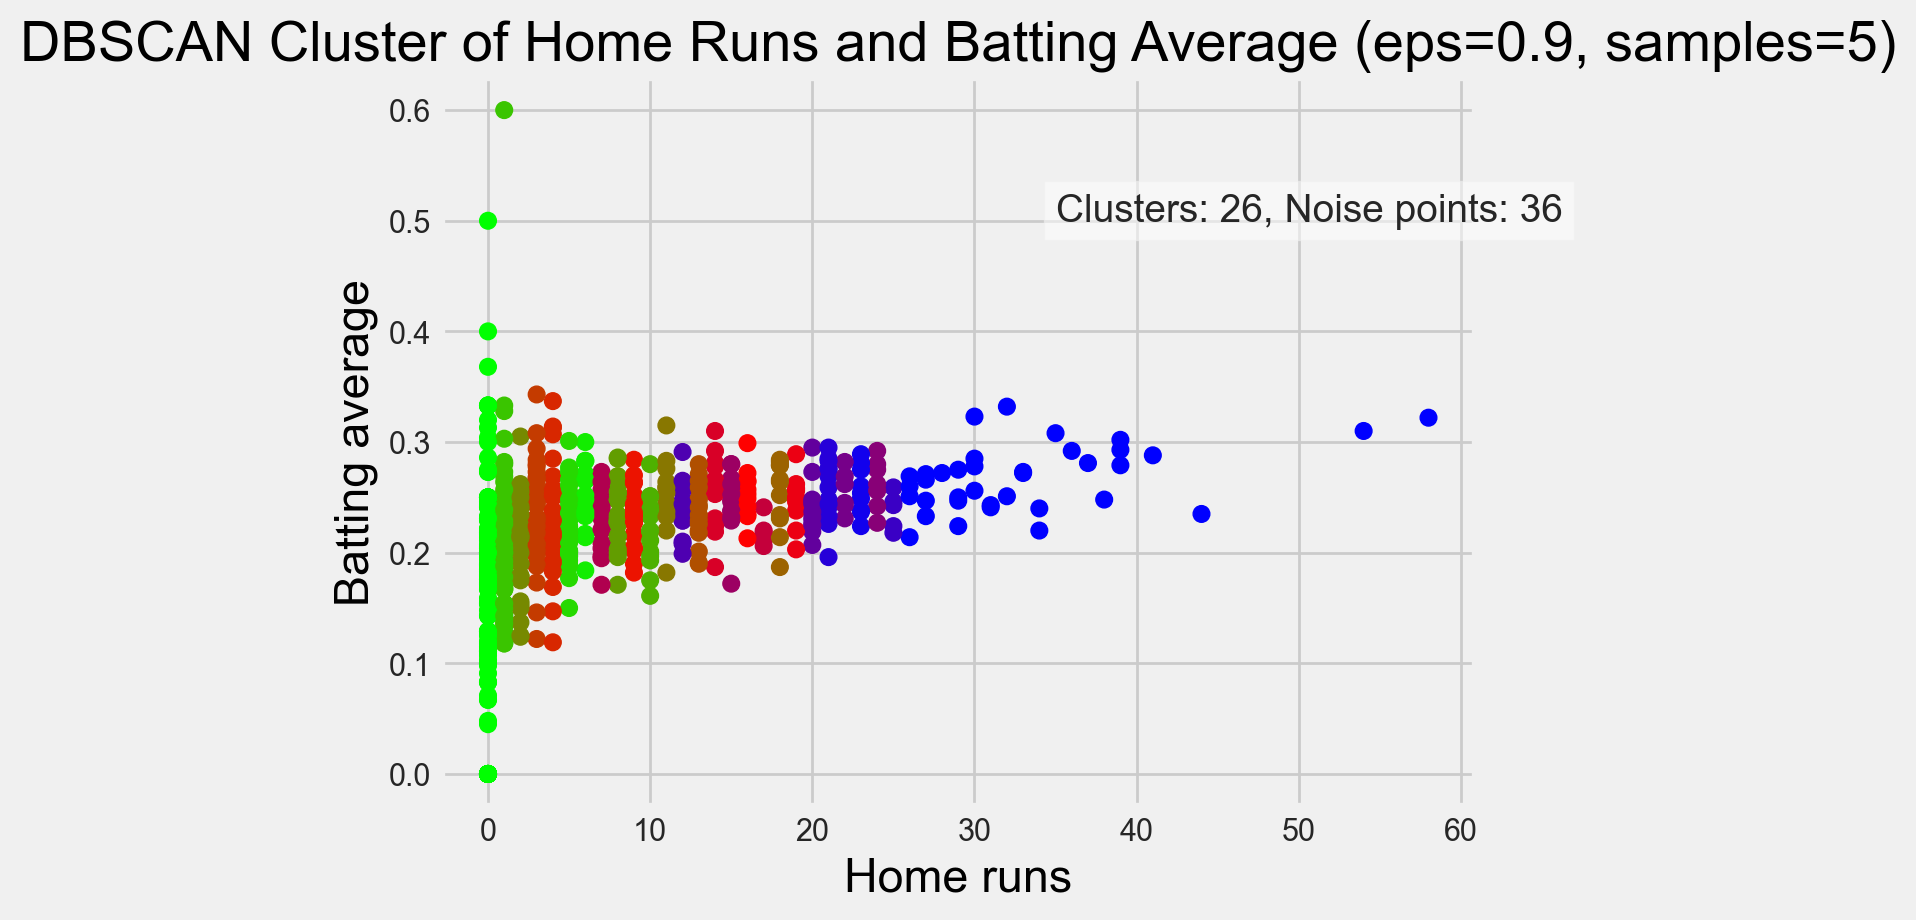

In [639]:
plt.scatter(mlb['HR'], mlb['BA'], c=labels, cmap='brg')
plt.title('DBSCAN Cluster of Home Runs and Batting Average (eps=0.9, samples=5)', color='black')
plt.xlabel('Home runs', color='black')
plt.ylabel('Batting average', color='black')
plt.text(35,0.5, 'Clusters: 26, Noise points: 36', bbox=dict(facecolor='white', alpha=0.5))
#plt.savefig('DBSCAN Cluster of Home Runs and Batting Average eps 0.9 samples 5.png')
plt.tight_layout()
plt.show()

### Set epsilon back to 1, but change minimum samples to 6

In [640]:
dbscan = DBSCAN(eps=1, min_samples=6)
labels = dbscan.fit_predict(X)

In [641]:
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)

In [642]:
print("Estimated number of clusters:", n_clusters_)
print("Estimated number of noise points: %d" % n_noise_)

Estimated number of clusters: 5
Estimated number of noise points: 46


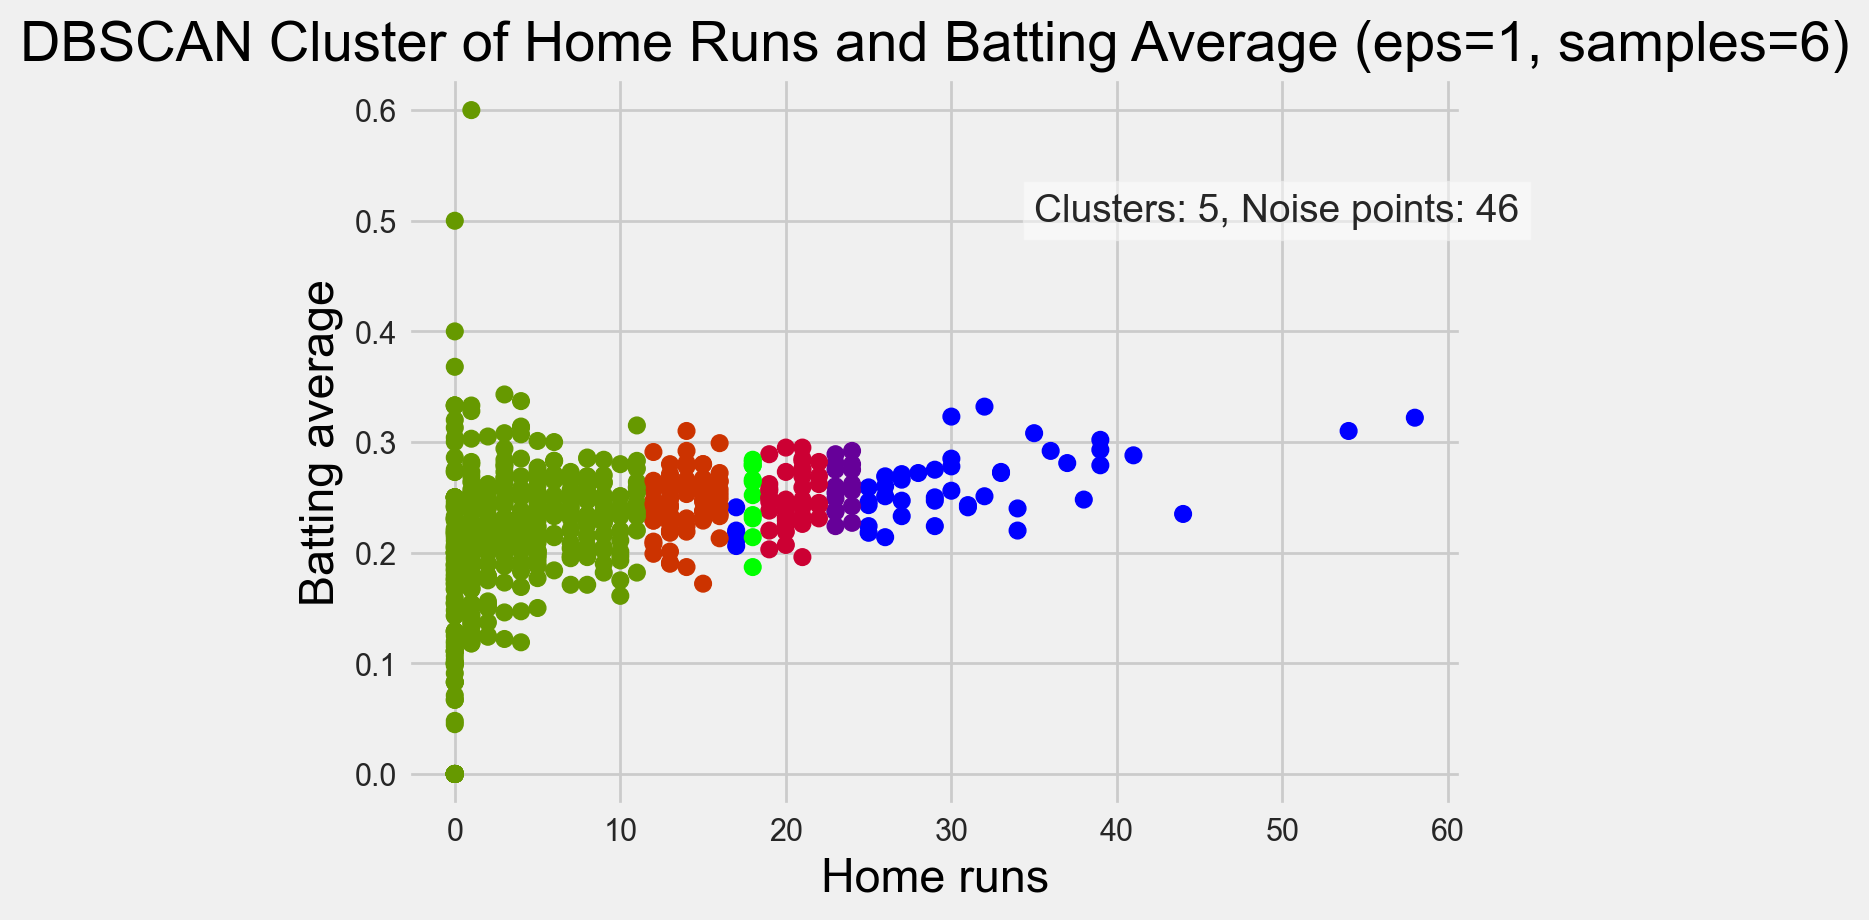

In [643]:
plt.scatter(mlb['HR'], mlb['BA'], c=labels, cmap='brg')
plt.title('DBSCAN Cluster of Home Runs and Batting Average (eps=1, samples=6)', color='black')
plt.xlabel('Home runs', color='black')
plt.ylabel('Batting average', color='black')
plt.text(35,0.5, 'Clusters: 5, Noise points: 46', bbox=dict(facecolor='white', alpha=0.5))
#plt.savefig('DBSCAN Cluster of Home Runs and Batting Average eps 1 samples 6.png')
plt.tight_layout()
plt.show()

# CONCLUSION

Each of the models had some problems. It may simply be that my dataset is unbalanced.